In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from xgboost import XGBClassifier
import joblib
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import os

/usr/local/lib/python3.5/dist-packages/xgboost/__init__.py:29: FutureWarning: Python 3.5 support is deprecated; XGBoost will require Python 3.6+ in the near future. Consider upgrading to Python 3.6+.
  FutureWarning)
/home/ss00/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/ss00/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private 

In [2]:
PATH = 'file:///home/ss00/churn_prj/'

### Dataset was splitted into 2 because of the spark memory issue

In [3]:
if False:
    raw_df_1 = os.listdir('./data1')[0]
    raw_df_2 = os.listdir('./data2')[0]

    print("featured data1 filename:", raw_df_1)
    print("featured data2 filename:", raw_df_2)
    preprocessed_df1 = pd.read_csv(PATH + 'data1/' + raw_df_1,header = 0)
    preprocessed_df2 = pd.read_csv(PATH + 'data2/' + raw_df_2,header = 0)
    
    # Column bind
    preprocessed_df = pd.merge(preprocessed_df1,preprocessed_df2, on = ['Id', 'label', 'data_type'], how = 'inner')
    print("Shape of df1 : ", preprocessed_df1.shape)
    print("Shape of df2 : ", preprocessed_df2.shape)
    print("Shape of merged : ", preprocessed_df.shape)

### Add new features

In [4]:
if False:
    preprocessed_df['accpt_answer_to_post'] = preprocessed_df['accepted_answ_cnt'] / preprocessed_df['post_cnt']
    preprocessed_df['accpt_answer_to_answer'] = preprocessed_df['accepted_answer_cnt_by_qner'] / preprocessed_df['answ_cnt']
    preprocessed_df['avg_answ_cnt_30days'] = preprocessed_df['ttl_answ_cnt_30days'] / preprocessed_df['post_cnt']
    preprocessed_df['ttl_q_and_a_cnt'] = preprocessed_df['post_cnt'] +  preprocessed_df['answ_cnt']
    preprocessed_df = preprocessed_df.fillna(0)
    preprocessed_df.to_csv('./data/preprocessed.csv', index = False)

# Code Starts from here

In [5]:
preprocessed_df = pd.read_csv('./data/preprocessed.csv')
preprocessed_df.head()

,Id,label,data_type,post_cnt,ttl_answ_cnt_30days,min_answ_cnt_30days,max_answ_cnt_30days,avg_answ_cnt_30days,accepted_answ_cnt,avg_comment_cnt,...,max_answ_bdword_cnt,min_answ_bdword_cnt,ttl_answ_bdword_cnt,avg_post_answer_interval,min_post_answer_interval,max_post_answer_interval,last_anw_post_dt_time_passed,accpt_answer_to_post,accpt_answer_to_answer,ttl_q_and_a_cnt
0,1000795,0,test,1,0,1,1,0.0,0,0.0,...,0.0,0.0,0.0,30.000000,30,30,30,0.0,0.000000,1
1,1001866,0,test,1,1,1,1,1.0,1,0.0,...,211.0,6.0,3305.0,0.576923,0,14,0,1.0,0.333333,52
2,1002185,1,train,0,0,0,0,0.0,0,0.0,...,74.0,74.0,74.0,29.000000,29,29,29,0.0,0.000000,1
3,1002442,1,train,0,0,0,0,0.0,0,0.0,...,51.0,51.0,51.0,30.000000,30,30,30,0.0,0.000000,1
4,1002883,0,train,0,0,1,1,0.0,0,0.0,...,25.0,25.0,25.0,30.000000,30,30,30,0.0,0.000000,1


In [6]:
print("train, validation,test dataset data point count")
preprocessed_df.groupby('data_type')['Id'].count()

train, validation,test dataset data point count


data_type
test      92912
train    340721
val       92871
Name: Id, dtype: int64

In [7]:
preprocessed_df.dtypes

Id                                int64
label                             int64
data_type                        object
post_cnt                          int64
ttl_answ_cnt_30days               int64
min_answ_cnt_30days               int64
max_answ_cnt_30days               int64
avg_answ_cnt_30days             float64
accepted_answ_cnt                 int64
avg_comment_cnt                 float64
ttl_comment_cnt                 float64
min_comment_cnt                 float64
max_comment_cnt                 float64
q_avg_score                     float64
q_max_score                     float64
q_min_score                     float64
q_ttl_score                     float64
q_avg_bdword                    float64
q_max_bdword                    float64
q_min_bdword                    float64
q_ttl_bdword                    float64
answ_cnt                          int64
accepted_answer_cnt_by_qner       int64
avg_answ_bdword_cnt             float64
max_answ_bdword_cnt             float64


In [8]:
pd.set_option('display.max_columns', None) 

In [9]:
preprocessed_df.describe()

,Id,label,post_cnt,ttl_answ_cnt_30days,min_answ_cnt_30days,max_answ_cnt_30days,avg_answ_cnt_30days,accepted_answ_cnt,avg_comment_cnt,ttl_comment_cnt,min_comment_cnt,max_comment_cnt,q_avg_score,q_max_score,q_min_score,q_ttl_score,q_avg_bdword,q_max_bdword,q_min_bdword,q_ttl_bdword,answ_cnt,accepted_answer_cnt_by_qner,avg_answ_bdword_cnt,max_answ_bdword_cnt,min_answ_bdword_cnt,ttl_answ_bdword_cnt,avg_post_answer_interval,min_post_answer_interval,max_post_answer_interval,last_anw_post_dt_time_passed,accpt_answer_to_post,accpt_answer_to_answer,ttl_q_and_a_cnt
count,5.265040e+05,526504.000000,526504.000000,526504.000000,526504.000000,526504.000000,526504.000000,526504.000000,526504.000000,526504.000000,526504.000000,526504.000000,526504.000000,526504.000000,526504.000000,526504.000000,526504.000000,526504.000000,526504.000000,526504.000000,526504.000000,526504.000000,526504.000000,526504.000000,526504.000000,526504.000000,526504.000000,526504.000000,526504.000000,526504.000000,526504.000000,526504.000000,526504.000000
mean,6.132848e+05,0.624478,1.207744,1.575954,0.900308,1.452823,0.766054,0.431182,0.782344,1.531924,0.582810,1.093908,3.311712,6.117211,2.148122,7.678244,87.059373,101.893625,76.134675,156.879306,1.500232,0.272672,29.383653,41.034313,23.142875,115.600985,22.332194,19.973497,25.939510,24.672941,0.179894,0.060916,2.707976
std,3.897641e+05,0.484258,2.248632,4.107974,1.021702,2.004908,1.083525,1.294674,1.514540,3.955419,1.423735,2.063531,31.066783,61.903823,27.081770,83.235103,120.082871,146.502981,113.633474,314.461198,7.274937,1.692826,61.778198,94.981970,56.074328,627.059455,10.420476,13.331719,7.110986,9.267857,0.350660,0.209551,7.796566
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12.500000,-12.000000,-72.000000,-75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.296045e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,24.000000,23.000000,0.000000,0.000000,1.000000
50%,5.954965e+05,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.500000,65.000000,45.000000,69.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,30.000000,30.000000,30.000000,0.000000,0.000000,1.000000
75%,8.806052e+05,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.000000,2.000000,0.000000,2.000000,2.000000,2.000000,1.000000,3.000000,127.000000,146.000000,108.000000,182.000000,1.000000,0.000000,42.000000,48.000000,26.000000,52.000000,30.000000,30.000000,30.000000,30.000000,0.000000,0.000000,2.000000
max,1.196386e+07,1.000000,157.000000,401.000000,105.000000,317.000000,48.000000,95.000000,54.000000,176.000000,54.000000,54.000000,7737.000000,7737.000000,7737.000000,20352.000000,4607.000000,5643.000000,4607.000000,24171.000000,523.000000,183.000000,3434.000000,4413.000000,3434.000000,67939.000000,30.000000,30.000000,30.000000,30.000000,1.000000,1.000000,525.000000


### Null value check

In [10]:
preprocessed_df.isnull().sum()

Id                              0
label                           0
data_type                       0
post_cnt                        0
ttl_answ_cnt_30days             0
min_answ_cnt_30days             0
max_answ_cnt_30days             0
avg_answ_cnt_30days             0
accepted_answ_cnt               0
avg_comment_cnt                 0
ttl_comment_cnt                 0
min_comment_cnt                 0
max_comment_cnt                 0
q_avg_score                     0
q_max_score                     0
q_min_score                     0
q_ttl_score                     0
q_avg_bdword                    0
q_max_bdword                    0
q_min_bdword                    0
q_ttl_bdword                    0
answ_cnt                        0
accepted_answer_cnt_by_qner     0
avg_answ_bdword_cnt             0
max_answ_bdword_cnt             0
min_answ_bdword_cnt             0
ttl_answ_bdword_cnt             0
avg_post_answer_interval        0
min_post_answer_interval        0
max_post_answe

### Data split

In [11]:
X_train = preprocessed_df.loc[preprocessed_df['data_type'] == 'train'].drop(columns = ['Id', 'label','data_type']).values
X_test = preprocessed_df.loc[preprocessed_df['data_type'] == 'test'].drop(columns = ['Id', 'label','data_type']).values
y_train = preprocessed_df.loc[preprocessed_df['data_type'] == 'train'][['label']].values
y_test = preprocessed_df.loc[preprocessed_df['data_type'] == 'test'][['label']].values

## Feature distribution

<Figure size 432x288 with 0 Axes>

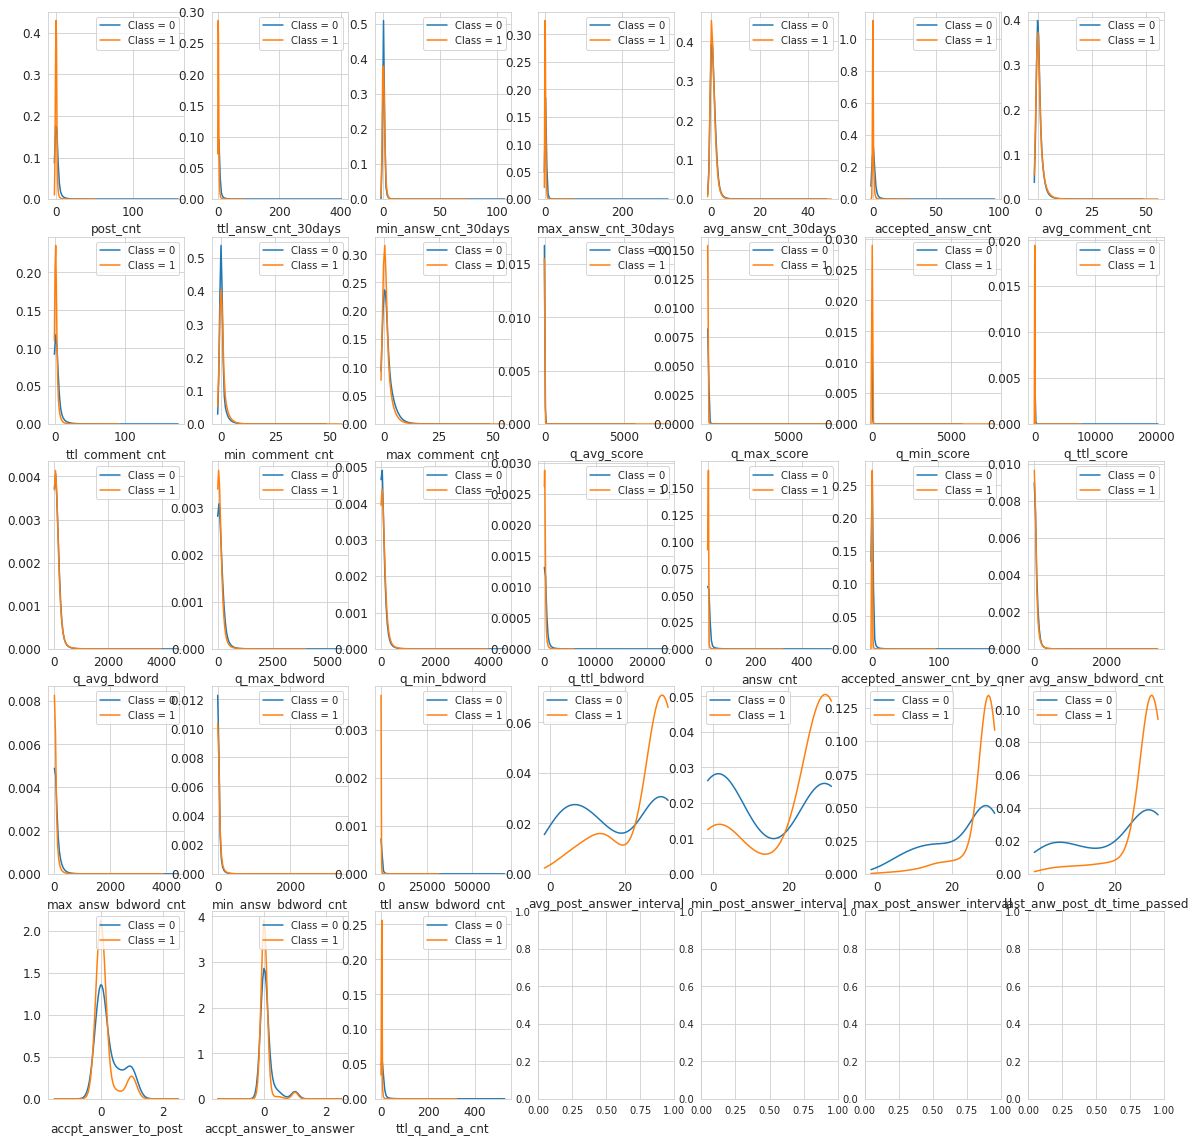

In [12]:
X_train_vis = preprocessed_df.drop(columns = ['Id', 'data_type'])
var = X_train_vis.columns.values[1:] # V1 ~ V28
i = 0
t0 = X_train_vis.loc[X_train_vis['label'] == 0] # Class : 0 인 행만 추출
t1 = X_train_vis.loc[X_train_vis['label'] == 1] # Class : 1 인 행만 추출

sns.set_style('whitegrid') # 그래프 스타일 지정
plt.figure()
fig, ax = plt.subplots(5, 7, figsize = (20, 20)) # 축 지정

for feature in var:
    i += 1
    plt.subplot(5, 7, i) # 28개의 그래프
    sns.kdeplot(t0[feature], bw = 0.5, label = "Class = 0")
    sns.kdeplot(t1[feature], bw = 0.5, label = "Class = 1")
    plt.xlabel(feature, fontsize = 12) # 라벨 속성값
    locs, labels = plt.xticks()
    plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.show()

## Oversampling in trainset

In [13]:
print("Data imbalanced in the trainset!")
preprocessed_df.loc[preprocessed_df['data_type'] == 'train'].groupby(['label'])['Id'].count()

Data imbalanced in the trainset!


label
0    134140
1    206581
Name: Id, dtype: int64

In [14]:
X_train_scaled = StandardScaler().fit_transform(X_train)

In [15]:
print("Before Oversampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before Oversampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

sm3 = SMOTE(random_state = 42, ratio = 1) 
X_train_res, y_train_res = sm3.fit_sample(X_train_scaled, y_train.ravel())

print("After Oversampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After Oversampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before Oversampling, counts of label '1': [206581]
Before Oversampling, counts of label '0': [134140] 



/home/ss00/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After Oversampling, counts of label '1': 206581
After Oversampling, counts of label '0': 206581


## Baseline model

In [16]:
models = []
models.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
# models.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
models.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
models.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
# models.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
models.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
models.append(('ScaledXGB', Pipeline([('Scaler', StandardScaler()),('XGB', XGBClassifier())])))
# models.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))

### AUC measure

In [17]:
n_fold = 5
kfold = KFold(n_splits = n_fold, random_state = 123)

/home/ss00/.local/lib/python3.5/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [18]:
scoring = 'roc_auc'
results = []
names = []

for name, model in models:
    cv_results = cross_val_score(model, X_train_res, y_train_res, cv = kfold, scoring = scoring, n_jobs = -1)
    results.append(cv_results)
    names.append(name)
    msg = "[%s]\tmean: %f\tstd: %f" % (name, cv_results.mean(), cv_results.std())
    print(msg)

[ScaledLR]	mean: 0.846090	std: 0.001685
[ScaledKNN]	mean: 0.842810	std: 0.008468
[ScaledCART]	mean: 0.776939	std: 0.023012
[ScaledRF]	mean: 0.873097	std: 0.013340
[ScaledXGB]	mean: 0.878589	std: 0.001852


In [19]:
results

[array([0.8476309 , 0.84708949, 0.84444783, 0.84367472, 0.84760624]),
 array([0.84368864, 0.84531463, 0.83510785, 0.83307746, 0.85686139]),
 array([0.76560701, 0.76686502, 0.76175662, 0.76768122, 0.82278286]),
 array([0.86713236, 0.86696429, 0.86587699, 0.8657572 , 0.89975325]),
 array([0.87854061, 0.87825703, 0.87710608, 0.87696091, 0.88207931])]

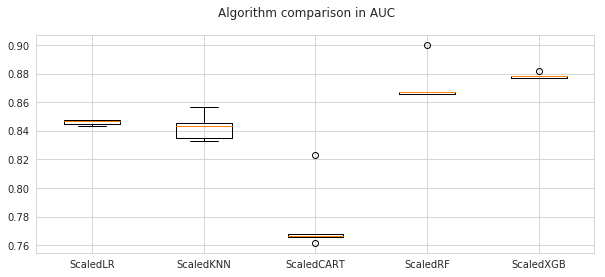

In [20]:
plt.rcParams["figure.figsize"] = (10,4)
fig = plt.figure()
fig.suptitle('Algorithm comparison in AUC')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.savefig('image/models_auc.png', dpi=300)
plt.show()

In [21]:
scoring = 'f1'
results = []
names = []

for name, model in models:
    cv_results = cross_val_score(model, X_train_res, y_train_res, cv = kfold, scoring = scoring, n_jobs = -1)
    results.append(cv_results)
    names.append(name)
    msg = "[%s]\tmean: %f\tstd: %f" % (name, cv_results.mean(), cv_results.std())
    print(msg)

[ScaledLR]	mean: 0.703198	std: 0.226265
[ScaledKNN]	mean: 0.706359	std: 0.200391
[ScaledCART]	mean: 0.718301	std: 0.146088
[ScaledRF]	mean: 0.756482	std: 0.131347
[ScaledXGB]	mean: 0.749204	std: 0.174369


In [22]:
results

[array([0.81867751, 0.81580518, 0.81536919, 0.81546419, 0.25067538]),
 array([0.81222788, 0.80202742, 0.80201449, 0.80986627, 0.30566114]),
 array([0.79140195, 0.79231772, 0.78953722, 0.79211413, 0.42613174]),
 array([0.82171369, 0.82326374, 0.82145026, 0.82219043, 0.49378961]),
 array([0.83580287, 0.83675874, 0.83609285, 0.83689914, 0.40046641])]

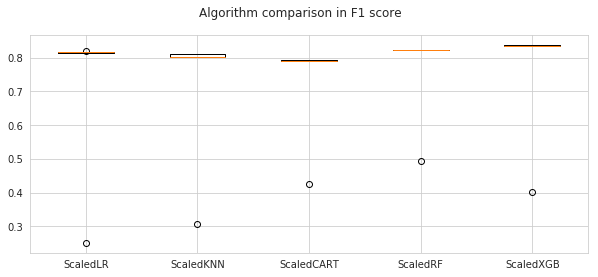

In [23]:
plt.rcParams["figure.figsize"] = (10,4)
fig = plt.figure()
fig.suptitle('Algorithm comparison in F1 score')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.savefig('image/models_f1.png', dpi=300)
plt.show()

## Random forest grid search for the hyper-parameters tuning

In [24]:
piped_model = Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier(random_state=1234))])

param_grid = {"RF__max_depth": [None, 4, 8, 12, 16],
#               "RF__max_features": ["auto","sqrt", "log2"],
              "RF__n_estimators": [300, 500, 800]}
print(param_grid)

{'RF__max_depth': [None, 4, 8, 12, 16], 'RF__n_estimators': [300, 500, 800]}


In [25]:
scoring = 'roc_auc'
kfold = KFold(n_splits = n_fold, random_state = 123)
grid = GridSearchCV(estimator = piped_model, param_grid = param_grid, scoring = scoring, cv = kfold, n_jobs = -1)
grid_result = grid.fit(X_train_res, y_train_res)

In [26]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for i in ['mean_test_score', 'std_test_score', 'param_RF__n_estimators']:
    print(i," : ", grid_result.cv_results_[i])

Best: 0.880506 using {'RF__max_depth': 16, 'RF__n_estimators': 800}
mean_test_score  :  [0.87397945 0.87415881 0.87426418 0.84276614 0.84379033 0.84391906
 0.86536334 0.86557615 0.86555414 0.87615285 0.87635404 0.87639445
 0.88032439 0.88047518 0.88050579]
std_test_score  :  [0.01328171 0.01321899 0.01318328 0.00135577 0.00112815 0.00107542
 0.0013306  0.00131735 0.00161125 0.00219067 0.00207082 0.00211708
 0.00441537 0.00435884 0.00436804]
param_RF__n_estimators  :  [300 500 800 300 500 800 300 500 800 300 500 800 300 500 800]


## Model evaluation in testset

#### Feature importance

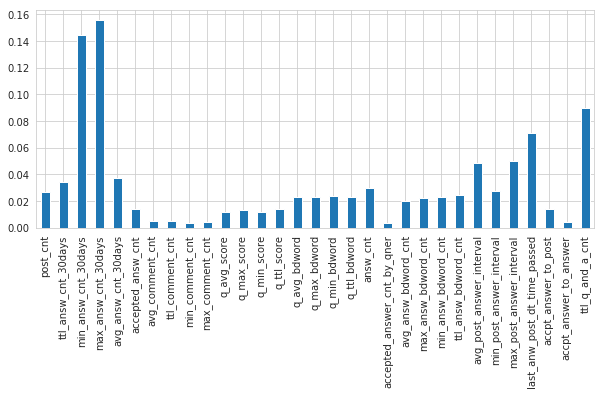

In [27]:
fine_tuned_RF = grid_result.best_estimator_
fine_tuned_RF.fit(X_train_res, y_train_res)
importances = pd.Series(fine_tuned_RF.named_steps['RF'].feature_importances_, index = preprocessed_df.drop(columns = ['Id', 'label','data_type']).columns)
importances.plot(kind = 'bar')
plt.savefig('image/feature_importance.png', dpi=300)
plt.show()

In [28]:
rf_pred_proba = fine_tuned_RF.predict_proba(X_test)[:, 1]
rf_pred = fine_tuned_RF.predict(X_test)

#### Confusion matrix

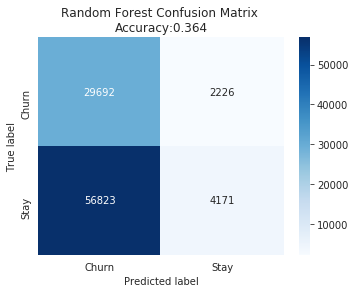

In [29]:
# Creates a confusion matrix
cm = confusion_matrix(y_test, rf_pred)

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['Churn','Stay'], 
                     columns = ['Churn','Stay'])

plt.figure(figsize=(5.5, 4))
sns.heatmap(cm_df, annot=True,cmap='Blues', fmt='g')
plt.title('Random Forest Confusion Matrix \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, rf_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('image/confusion_matrix.png', dpi=300)
plt.show()

#### ROC curve

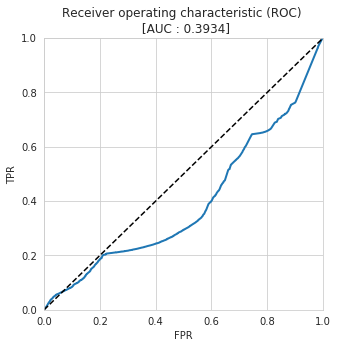

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, rf_pred_proba)
plt.figure(figsize=(5, 5))
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('Receiver operating characteristic (ROC) \n [AUC : %0.4f]' %(roc_auc_score(y_test, rf_pred_proba) ))
plot_roc_curve(fpr, tpr)
plt.savefig('image/roc_curve.png', dpi=300)
plt.show()

### Model evalution summary

In [31]:
def model_evaluation(label, predict, pred_proba):
    cf_matrix = confusion_matrix(label, predict)
    Accuracy = (cf_matrix[0][0] + cf_matrix[1][1]) / sum(sum(cf_matrix))
    Precision = cf_matrix[1][1] / (cf_matrix[1][1] + cf_matrix[0][1])
    Recall = cf_matrix[1][1] / (cf_matrix[1][1] + cf_matrix[1][0])
    F1_Score = (2 * Recall * Precision) / (Recall + Precision)
    print("Model_evaluation with label: 1 = Chuners")
    print("="*30)
    print("Accuracy: %0.4f" %(Accuracy))
    print("Precision: %0.4f" %(Precision))
    print("Recall: %0.4f" %(Recall))
    print("F1-Score: %0.4f" %(F1_Score))
    print("AUC : %0.4f" %(roc_auc_score(label, pred_proba)))
    print("**F1-Score & AUC average : %0.4f" %((F1_Score+roc_auc_score(label, pred_proba))/2))
    return "="*30

In [32]:
print("===== Test dataset score =====")
print(model_evaluation(label = y_test, predict = rf_pred, pred_proba = rf_pred_proba))

===== Test dataset score =====
Model_evaluation with label: 1 = Chuners
Accuracy: 0.3645
Precision: 0.6520
Recall: 0.0684
F1-Score: 0.1238
AUC : 0.3934
**F1-Score & AUC average : 0.2586


In [33]:
if False:
    # save
    joblib.dump(fine_tuned_RF, "fine_tuned_rf.pkl") 
    # load
    fine_tuned_RF = joblib.load("fine_tuned_rf.pkl")